In [1]:
import numpy as np
import astropy.units as u
from astropy.coordinates import Distance
from agnpy.emission_regions import Blob
from agnpy.synchrotron import Synchrotron
import matplotlib.pyplot as plt

In [2]:
# set the spectrum normalisation (total energy in electrons in this case)
spectrum_norm = 1e48 * u.Unit("erg")
# define the spectral function through a dictionary
spectrum_dict = {
    "type": "PowerLaw",
    "parameters": {"p": 2.8, "gamma_min": 1e2, "gamma_max": 1e7}
}
R_b = 1e16 * u.cm
B = 1 * u.G
z = Distance(1e27, unit=u.cm).z
delta_D = 10
Gamma = 10
blob = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict)

In [3]:
synchro = Synchrotron(blob)

In [4]:
nu = np.logspace(8, 23) * u.Hz
sed1 = Synchrotron.evaluate_sed_flux(
    nu, 
    blob.z, 
    blob.d_L, 
    blob.delta_D, 
    blob.B, 
    blob.R_b, 
    blob.gamma, 
    np.trapz, 
    False, 
    blob.n_e, 
    *blob.n_e.parameters
)
sed2 = Synchrotron.evaluate_sed_flux(
    nu, 
    blob.z, 
    blob.d_L, 
    blob.delta_D, 
    blob.B, 
    blob.R_b, 
    blob.gamma, 
    np.trapz, 
    True, 
    blob.n_e, 
    *blob.n_e.parameters
)

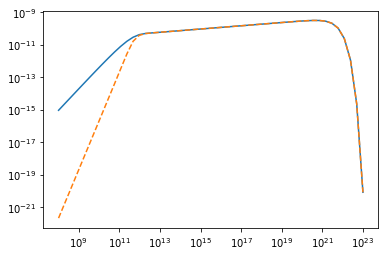

In [8]:
plt.loglog(nu, sed1)
plt.loglog(nu, sed2, ls="--")

In [6]:
%%timeit
sed1 = Synchrotron.evaluate_sed_flux(
    nu, 
    blob.z, 
    blob.d_L, 
    blob.delta_D, 
    blob.B, 
    blob.R_b, 
    blob.gamma, 
    np.trapz, 
    False, 
    blob.n_e, 
    *blob.n_e.parameters
)

5.97 ms ± 33.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%%timeit
synchro.sed_flux(nu)

6 ms ± 24 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
